<a href="https://colab.research.google.com/github/ranand97/ranand97/blob/main/HumanaCompetion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [221]:
# Your code goes here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn import metrics
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving target_train.csv to target_train (7).csv
User uploaded file "target_train (7).csv" with length 108426 bytes


In [222]:
data = 'target_train.csv'

In [223]:
df=pd.read_csv(data)
df.head()

,id,therapy_id,therapy_start_date,therapy_end_date,tgt_ade_dc_ind,race_cd,est_age,sex_cd,cms_disabled_ind,cms_low_income_ind
0,1005597228,1005597228-TAGRISSO-1,2020-03-11T00:00:00.000+0000,2020-09-07,0,1.00,NaN,NaN,NaN,NaN
1,1005964858,1005964858-TAGRISSO-1,2021-08-23T00:00:00.000+0000,2021-09-22,1,1.00,86.00,M,0.00,0.00
2,1007548572,1007548572-TAGRISSO-1,2022-01-17T00:00:00.000+0000,2022-07-16,0,1.00,79.00,F,0.00,1.00
3,1009508044,1009508044-TAGRISSO-1,2020-01-23T00:00:00.000+0000,2020-07-21,0,1.00,70.00,F,1.00,1.00
4,1028064791,1028064791-TAGRISSO-1,2021-02-23T00:00:00.000+0000,2021-08-22,0,2.00,74.00,F,1.00,1.00


In [224]:
mode_value = df['tgt_ade_dc_ind'].mode()[0]
df['tgt_ade_dc_ind'] = df['tgt_ade_dc_ind'].fillna(mode_value)
mode_value1 = df['race_cd'].mode()[0]
df['race_cd'] = df['race_cd'].fillna(mode_value1)
mode_value2 = df['est_age'].mode()[0]
df['est_age'] = df['est_age'].fillna(mode_value2)
mode_value3 = df['sex_cd'].mode()[0]
df['sex_cd'] = df['sex_cd'].fillna(mode_value3)
mode_value4 = df['cms_disabled_ind'].mode()[0]
df['cms_disabled_ind'] = df['cms_disabled_ind'].fillna(mode_value4)
mode_value5 = df['cms_low_income_ind'].mode()[0]
df['cms_low_income_ind'] = df['cms_low_income_ind'].fillna(mode_value5)
df.head()

,id,therapy_id,therapy_start_date,therapy_end_date,tgt_ade_dc_ind,race_cd,est_age,sex_cd,cms_disabled_ind,cms_low_income_ind
0,1005597228,1005597228-TAGRISSO-1,2020-03-11T00:00:00.000+0000,2020-09-07,0,1.00,65.00,F,0.00,0.00
1,1005964858,1005964858-TAGRISSO-1,2021-08-23T00:00:00.000+0000,2021-09-22,1,1.00,86.00,M,0.00,0.00
2,1007548572,1007548572-TAGRISSO-1,2022-01-17T00:00:00.000+0000,2022-07-16,0,1.00,79.00,F,0.00,1.00
3,1009508044,1009508044-TAGRISSO-1,2020-01-23T00:00:00.000+0000,2020-07-21,0,1.00,70.00,F,1.00,1.00
4,1028064791,1028064791-TAGRISSO-1,2021-02-23T00:00:00.000+0000,2021-08-22,0,2.00,74.00,F,1.00,1.00


In [225]:
df.isnull().values.any()

False

In [226]:
def remove_out(column, df):
  Q1 = np.percentile(df[column], 25, interpolation = 'midpoint')
  Q3 = np.percentile(df[column], 75, interpolation = 'midpoint')
  IQR = Q3 - Q1
  upper = np.where(df[column] >= (Q3+1.5*IQR))
  lower = np.where(df[column] <= (Q1-1.5*IQR))
  df.drop(upper[0], inplace = True)
  df.drop(lower[0], inplace = True)
  df.reset_index(drop=True, inplace=True)
  return df

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn import metrics



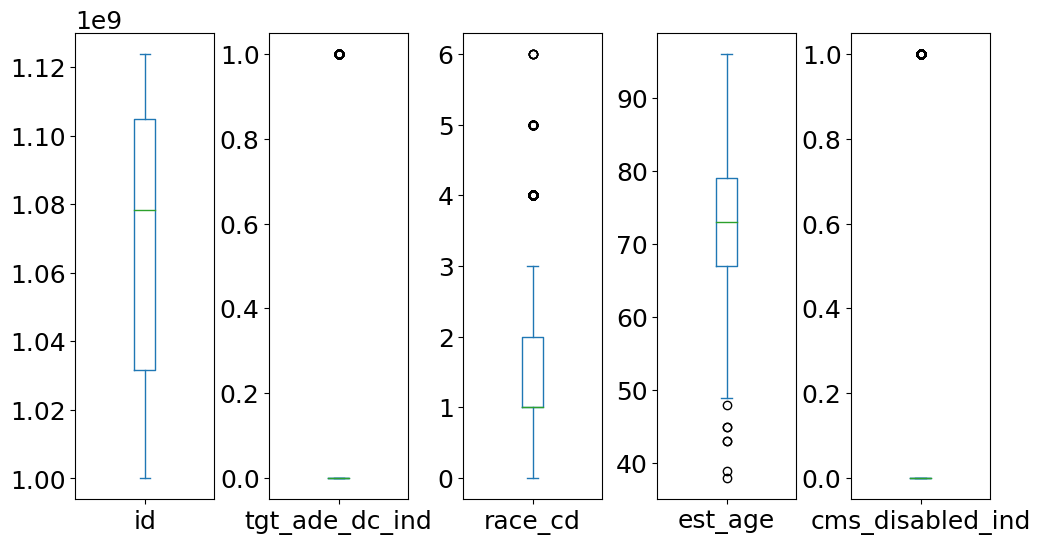

In [228]:
df.iloc[:,:-1].plot(kind='box', subplots=True, layout=(2,14),figsize=(14,14), sharex=False, sharey=False)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=2,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()


In [229]:
def remove_out(column, df):
  Q1 = np.percentile(df[column], 25, interpolation = 'midpoint')
  Q3 = np.percentile(df[column], 75, interpolation = 'midpoint')
  IQR = Q3 - Q1
  upper = np.where(df[column] >= (Q3+1.5*IQR))
  lower = np.where(df[column] <= (Q1-1.5*IQR))
  df.drop(upper[0], inplace = True)
  df.drop(lower[0], inplace = True)
  df.reset_index(drop=True, inplace=True)
  return df

In [230]:

columns_to_drop = ['therapy_id','therapy_start_date','therapy_end_date','sex_cd']

# Drop the specified columns
df.drop(columns=columns_to_drop, axis=1, inplace=True)
print(df.columns)




Index(['id', 'tgt_ade_dc_ind', 'race_cd', 'est_age', 'cms_disabled_ind',
       'cms_low_income_ind'],
      dtype='object')


In [231]:
x= df.copy();
x.drop('cms_disabled_ind',axis = 1,inplace = True)
y = df['cms_disabled_ind']

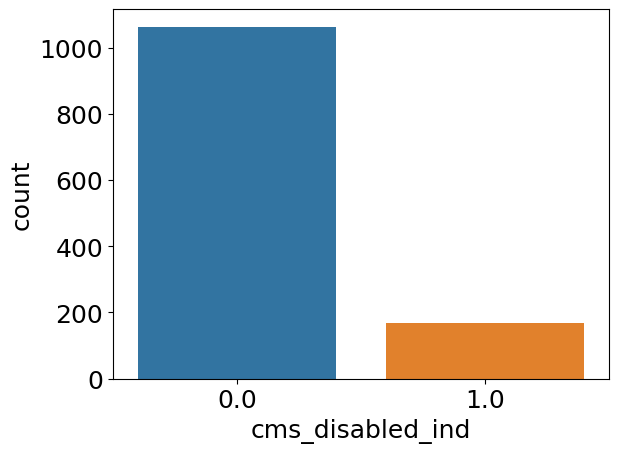

In [232]:
sns.countplot(x="cms_disabled_ind", data =df)
plt.show()

In [233]:
from imblearn.combine import SMOTETomek

# Assuming x and y are defined (features and labels)

# Create an instance of SMOTE with a smaller n_neighbors
smote = SMOTE(sampling_strategy='auto', random_state=123, k_neighbors=1)  # Adjust k_neighbors as needed

# Create an instance of SMOTETomek with SMOTE as the sampling strategy
smk = SMOTETomek(random_state=123, smote=smote)

# Apply SMOTE and Tomek links to balance the dataset
x_res, y_res = smk.fit_resample(x, y)



In [234]:
x = minmax_scale(x_res)

In [213]:
X_train, X_test, y_train, y_test = train_test_split(x, y_res, test_size=.2,random_state =123)

In [237]:
data_preprocessed = pd.DataFrame(x, columns = ['race_id', 'est_age','tgt_ade_dc_ind','id','cms_disabled_ind'])
data_preprocessed['cms_disabled_ind'] = y_res
data_preprocessed.head()

,race_id,est_age,tgt_ade_dc_ind,id,cms_disabled_ind
0,0.04,0.00,0.17,0.47,0.00
1,0.05,1.00,0.17,0.83,0.00
2,0.06,0.00,0.17,0.71,0.00
3,0.08,0.00,0.17,0.55,1.00
4,0.23,0.00,0.33,0.62,1.00


In [238]:
! pip install lazypredict

In [239]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

In [241]:
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 29/29 [00:04<00:00,  6.78it/s]

[LightGBM] [Info] Number of positive: 711, number of negative: 721
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 835
[LightGBM] [Info] Number of data points in the train set: 1432, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496508 -> initscore=-0.013967
[LightGBM] [Info] Start training from score -0.013967


In [242]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.96,0.96,0.96,0.96,0.47
LGBMClassifier,0.96,0.96,0.96,0.96,0.15
RandomForestClassifier,0.95,0.95,0.95,0.95,0.83
ExtraTreesClassifier,0.94,0.94,0.94,0.94,0.37
BaggingClassifier,0.94,0.94,0.94,0.94,0.09
DecisionTreeClassifier,0.93,0.93,0.93,0.93,0.04
AdaBoostClassifier,0.91,0.91,0.91,0.91,0.40
ExtraTreeClassifier,0.91,0.90,0.90,0.90,0.02
LabelSpreading,0.89,0.89,0.89,0.89,0.27
